<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->
# PHY321: Classical Mechanics 1
<!-- dom:AUTHOR: Homework 4, due Monday  February 10 -->
<!-- Author: -->  
**Homework 4, due Monday  February 10**

Date: **Feb 14, 2020**

### Practicalities about  homeworks and projects

1. You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group you can hand in one answer only if you wish. **Remember to write your name(s)**!

2. Homeworks are available Wednesday/Thursday the week before the deadline. The deadline is at the Friday lecture.

3. How do I(we)  hand in?  You can hand in the paper and pencil exercises as a hand-written document. For this homework this applies to exercises 1-5. Alternatively, you can hand in everyhting (if you are ok with typing mathematical formulae using say Latex) as a jupyter notebook at D2L. The numerical exercise(s) (exercise 6 here) should always be handed in as a jupyter notebook by the deadline at D2L. 

### Introduction to homework 4

This week's sets of classical pen and paper and computational
exercises deal with simple motion problems and conservation laws; energy, momentum and angular momentum. These conservation laws are central in Physics and understanding them properly lays the foundation for understanding and analyzing more complicated physics problems.
The relevant reading background is
1. chapters 3, 4.1, 4.2 and 4.3 of Taylor (there are many good examples there) and

2. chapters 10-13 of Malthe-Sørenssen.

In both textbooks there are many nice worked out examples. Malthe-Sørenssen's text contains also several coding examples you may find useful. 

The numerical homework focuses on another motion problem where you can
use the code you developed in homework 3, almost entirely. Please take
a look at the posted solution (jupyter-notebook) for homework 3. You
need only to change the forces at play. The problem at hand is a
classic, the gravitational force acting between the Sun and the
Earth. Here you will notice also that the standard Euler-integration
algorithm is not the best choice and we will introduce the so-called
Euler-Cromer method and the Velocity-Verlet method. These methods will
give much more stable numerical results with only few additions to
your code.

The code you develop here will also be reused when we analyze energy
conservation in homework set 5. And for those of you doing the honors project, it serves as a starting point for the solar system variant.

### Exercise 1 (10 pt), Conservation laws, Energy and momentum

* 1a (2pt) How do we define a conservative force?

A conservative force is a force whose property is that the total work
done in moving an object between two points is independent of the
taken path. This means that the work on an object under the influence
of a conservative force, is independent on the path of the object. It
depends only on the spatial degrees of freedom and it is possible to
assign a numerical value for the potential at any point. It leads to
conservation of energy. The gravitational force is an example of a
conservative force.

If you wish to read more about conservative forces or not, Feyman's lectures from 1963 are quite interesting.
He states for example that **All fundamental forces in nature appear to be conservative**.
This statement was made while developing his argument that *there are no nonconservative forces*.
You may enjoy the link to [Feynman's lecture](http://www.feynmanlectures.caltech.edu/I_14.html).

An important condition for the final work to be independent of the path is that the **curl** of the force is zero, that
is

$$
\boldsymbol{\nabla} \times \boldsymbol{F}=0
$$

* 1b (4pt) Use the work-energy theorem to show that energy is conserved with a conservative force.

The work-energy theorem states that the work done $W$ by a force $\boldsymbol{F}$ that moves an object from a position $\boldsymbol{r}_0$ to a new position $\boldsymbol{r}_1$

$$
W=\int_{\boldsymbol{r}_0}^{\boldsymbol{r}_1}\boldsymbol{F}\boldsymbol{dr}=\frac{1}{2}mv_1^2-\frac{1}{2}mv_0^2,
$$

where $v_1^2$ is the velocity squared at a time $t_1$ and $v_0^2$ the corresponding quantity at a time $t_0$.
The work done is thus the difference in kinetic energies. We can rewrite the above equation as

$$
\frac{1}{2}mv_1^2=\int_{\boldsymbol{r}_0}^{\boldsymbol{r}_1}\boldsymbol{F}\boldsymbol{dr}+\frac{1}{2}mv_0^2,
$$

that is the final kinetic energy is equal to the initial kinetic energy plus the work done by the force over a given path from a  position $\boldsymbol{r}_0$ at time $t_0$ to a final position position $\boldsymbol{r}_1$ at a later time $t_1$.



* 1c (4pt) Assume that you have only internal two-body forces acting on $N$ objects in an isolated system. The force from object $i$ on object $j$ is $\boldsymbol{f}_{ij}$. Show that the linear momentum is conserved.

Here we use Newton's third law and assume that our system is only
affected by so-called internal forces.  This means that the force
$\boldsymbol{f}_{ij}$ from object $i$ acting on object $j$ is equal to the
force acting on object $j$ from object $i$ but with opposite sign,
that is $\boldsymbol{f}_{ij}=-\boldsymbol{f}_{ji}$.

The total linear momentum is defined as

$$
\boldsymbol{P}=\sum_{i=1}^N\boldsymbol{p}_i=\sum_{i=1}^Nm_i\boldsymbol{v}_i,
$$

where $i$ runs over all objects, $m_i$ is the mass of object $i$ and $\boldsymbol{v}_i$ its corresponding velocity.

The force acting on object $i$ from all the other objects is (lower
case letters for individual objects and upper case letters for total
quantities)

$$
\boldsymbol{f}_i=\sum_{j=1}^N\boldsymbol{f}_{ji}.
$$

Summing over all objects the net force is

$$
\sum_{i=1}^N\boldsymbol{f}_i=\sum_{i=1}^N\sum_{j=1;j\ne i}^N\boldsymbol{f}_{ji}.
$$

We are summing freely over all objects with the constraint that $i\ne j$ (no self-interactions). 
We can now manipulate the double sum as

$$
\sum_{i=1}^N\sum_{j=1;j\ne i}^N\boldsymbol{f}_{ji}=\sum_{i=1}^N\sum_{j>i}^N(\boldsymbol{f}_{ji}+\boldsymbol{f}_{ij}).
$$

Convince yourself about this by setting $N=2$ and $N=3$. Nweton's third law says
$\boldsymbol{f}_{ij}=-\boldsymbol{f}_{ji}$, which means we have

$$
\sum_{i=1}^N\sum_{j=1;j\ne i}^N\boldsymbol{f}_{ji}=\sum_{i=1}^N\sum_{j>i}^N(\boldsymbol{f}_{ji}-\boldsymbol{f}_{ji})=0.
$$

The total force due to internal degrees of freedom only is thus $0$.
If we then use the definition that

$$
\sum_{i=1}^N\boldsymbol{f}_i=\sum_{i=1}^Nm_i\frac{d\boldsymbol{v}_i}{dt}=\sum_{i=1}^N\frac{d\boldsymbol{p}_i}{dt}=\frac{d \boldsymbol{P}}{dt}=0,
$$

where we assumed that $m_i$ is independent of time, we see that time derivative of the total momentum is zero.
We say then that the linear momentum is a constant of the motion. It is conserved.






### Exercise 2 (10 pt), Conservation of angular momentum

* 2a (2pt) Define angular momentum and the torque for a single object with external forces only. 

The angular moment $\boldsymbol{l}_i$ for a given object $i$ is defined as

$$
\boldsymbol{l}_i = \boldsymbol{r}_i \times \boldsymbol{p}_i,
$$

where $\boldsymbol{p}_i=m_i\boldsymbol{v}_i$. With external forces only defining the acceleration and the mass being time independent, the momentum is the integral over the external force as function of time, that is

$$
\boldsymbol{p}_i(t)=\boldsymbol{p}_i(t_0)+\int_{t_0}^t \boldsymbol{f}_i^{\mathrm{ext}}(t')dt'.
$$

The torque for one object is

$$
\boldsymbol{\tau}_i=\frac{d\boldsymbol{l}_i}{dt} = \frac{dt(\boldsymbol{r}_i \times \boldsymbol{p}_i)}{dt}=\boldsymbol{r}_i \times \frac{d\boldsymbol{p}_i}{dt}=\boldsymbol{r}_i \times \boldsymbol{f}_i,
$$

* 2b (4pt) Define angular momentum and the torque for a system with $N$ objects/particles  with external and internal forces. The force from object $i$ on object $j$ is $\boldsymbol{F}_{ij}$.

The total angular momentum $\boldsymbol{L}$ is defined as

$$
\boldsymbol{L}=\sum_{i=1}^N\boldsymbol{l}_i = \sum_{i=1}^N\boldsymbol{r}_i \times \boldsymbol{p}_i.
$$

and the total torque is (using the expression for one object from 2a)

$$
\boldsymbol{\tau}=\sum_{i=1}^N\frac{d\boldsymbol{l}_i}{dt} = \sum_{i=1}^N\boldsymbol{r}_i \times \boldsymbol{f}_i.
$$

The force acting on one object is $\boldsymbol{f}_i=\boldsymbol{f}_i^{\mathrm{ext}}+\sum_{j=1}^N\boldsymbol{f}_{ji}$.

* 2c (4pt) With internal forces only, what is the mathematical form of the forces that allows for angular momentum to be conserved? 

Using the results from 1c, we can rewrite without external forces our torque as

$$
\boldsymbol{\tau}=\sum_{i=1}^N\frac{\boldsymbol{l}_i}{dt} = \sum_{i=1}^N\boldsymbol{r}_i \times \boldsymbol{f}_i=\sum_{i=1}^N(\boldsymbol{r}_i \times \sum_{j=1}^N\boldsymbol{f}_{ji}),
$$

which gives

$$
\boldsymbol{\tau}=\sum_{i=1}^N\sum_{j=1;j\ne i}^N(\boldsymbol{r}_i \times \boldsymbol{f}_{ji}).
$$

We can rewrite this as (convince yourself again about this)

$$
\boldsymbol{\tau}=\sum_{i=1}^N\sum_{j>i}^N(\boldsymbol{r}_i \times \boldsymbol{f}_{ji}+\boldsymbol{r}_j \times \boldsymbol{f}_{ij}),
$$

and using Newton's third law we have

$$
\boldsymbol{\tau}=\sum_{i=1}^N\sum_{j>i}^N(\boldsymbol{r}_i -\boldsymbol{r}_j) \times \boldsymbol{f}_{ji}.
$$

If the force is proportional to $\boldsymbol{r}_i -\boldsymbol{r}_j$ then angular momentum is conserved since the cross-product of a vector with itself is zero. We say thus that angular momentum is a constant of the motion.

### Exsercise 3 (10pt), Example of potential

Consider a particle of mass $m$ moving according to the potential

$$
V(x,y,z)=A\exp\left\{-\frac{x^2+z^2}{2a^2}\right\}.
$$

* 3a (2pt) Is energy conserved? If so, why? 

In this exercise $A$ and $a$ are constants. The force is given by the derivative of $V$ with respect to the spatial degrees of freedom and since the potential depends only of these degrees of freedom force is conservative and energy is conserved.

* 3b (4pt) Which of  the quantities, $p_x,p_y,p_z$ are conserved?

Taking the derivatives with respect to time shows that only $p_y$ is conserved.

* 3c (4pt) Which of  the quantities, $L_x,L_y,L_z$ are conserved?

Only $L_y$ is conserved. 


### Exercise 4 (10pt), Angular momentum case

At $t=0$ we have a single object with position $\boldsymbol{r}_0=x_0\boldsymbol{e}_x+y_0\boldsymbol{e}_y$. We add also a force in the $x$-direction at $t=0$. We assume that the object is at rest at $t=0$.

$$
\boldsymbol{F} = F\boldsymbol{e}_x.
$$

* 4a (3pt) Find the velocity and momentum at a given time $t$ by integrating over time with the above initial conditions.

There is no velocity in the $x$- and $y$-directions at $t=0$, thus $\boldsymbol{v}_0=0$. The force is constant and acting only in the $x$-direction. We have then (dropping vector symbols and setting $t_0=0$)

$$
v_x(t) = \int_0^t a(t')dt'=\int_0^t\frac{F}{m}dt'=\frac{F}{m}t.
$$

* 4b (3pt) Find also the position at a time $t$.

In the $x$-direction we have then

$$
x(t) = \int_0^t v_x(t')dt'=x_0+\frac{F}{2m}t^2,
$$

resulting in

$$
\boldsymbol{r}(t)=(x_0+\frac{F}{2m}t^2)\boldsymbol{e}_x+y_0\boldsymbol{e}_y.
$$

* 4c (4pt) Use the position and the momentum to find the angular momentum and the torque. Is angular momentum conserved?

Velocity and position are defined in the $xy$-plane only which means that only angular momentum in the $z$-direction is non-zero. The angular momentum is

$$
\boldsymbol{l} = (x(t)v_y(t)-y(t)v_x(t))\boldsymbol{e}_z=-y_0\frac{F}{m}t\boldsymbol{e}_z,
$$

which results in a torque $\boldsymbol{\tau}=-y_0\frac{F}{m}\boldsymbol{e}_z$, which is not zero. Thus, angular momentum is not conserved.



### Exercise 5 (10pt), forces  and potentials

A particle of mass $m$ has velocity $v=\alpha/x$, where $x$ is its displacement.

* 5a (3pt) Find the force $F(x)$ responsible for the motion.

Here, since the force is assumed to be conservative (only dependence on $x$), we can use energy conservation.
Assuming that the total energy at $t=0$ is $E_0$, we have

$$
E_0=V(x)+\frac{1}{2}mv^2=V(x)+\frac{1}{2}m\frac{\alpha^2}{x^2}.
$$

Taking the derivative wrt $x$ we have

$$
\frac{dV}{dx}-m\frac{\alpha^2}{x^3}=0,
$$

and since $F(x)=-dV/dx$ we have

$$
F(x)=-m\frac{\alpha^2}{x^3}.
$$

A particle is thereafter under the influence of a force $F=-kx+kx^3/\alpha^2$, where $k$ and $\alpha$ are constants and $k$ is positive.

* 5b (3pt) Determine $V(x)$  and discuss the motion. It can be convenient here to make a sketch/plot of the potential as function of $x$.

We assume that the potential is zero at say $x=0$. Integrating the force from zero to $x$ gives

$$
V(x) = \int_0^x F(x')dx'=\frac{kx^2}{2}-\frac{kx^4}{4\alpha^2}.
$$

The following code plots the potential. We have chosen values of $\alpha=k=1.0$. Feel free to experiment with other values. We plot $V(x)$ for a domain of $x\in [-2,2]$.

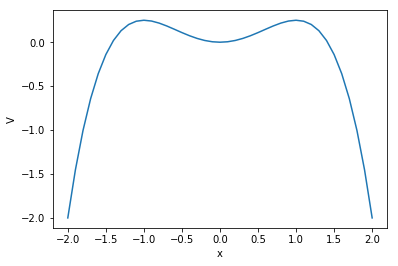

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

x0= -2.0
xn = 2.1
Deltax = 0.1
alpha = 1.0
k = 1.0
#set up arrays
x = np.arange(x0,xn,Deltax)
n = np.size(x)
V = np.zeros(n)
V = 0.5*k*x*x-0.25*k*(x**4)/(alpha*alpha)
plt.plot(x, V)
plt.xlabel("x")
plt.ylabel("V")
plt.show()

From the plot here (with the chosen parameters) 
1. we see that with a given initial velocity we can overcome the potential energy barrier

and leave the potential well for good.
1. If the initial velocity is smaller (see next exercise) than a certain value, it will remain trapped in the potential well and oscillate back and forth around $x=0$. This is where the potential has its minimum value. 

2. If the kinetic energy at $x=0$ equals the maximum potential energy, the object will oscillate back and forth between the minimum potential energy at $x=0$ and the turning points where the kinetic energy turns zero. These are the so-called non-equilibrium points. 

* 5c (4pt)  What happens when the energy of the particle is $E=(1/4)k\alpha^2$? Hint: what is the maximum value of the potential energy?

From the figure we see that
the potential has a minimum at at $x=0$ then rises until $x=\alpha$ before falling off again. The maximum
potential, $V(x\pm \alpha) = k\alpha^2/4$. If the energy is higher, the particle cannot be contained in the
well. The turning points are thus defined by $x=\pm \alpha$. And from the previous plot you can easily see that this is the case ($\alpha=1$ in the abovementioned Python code). 


### Exercise 6 (10pt) and 7 (40pt)

The aim of this exercise (as well as the next) is to study the motion
of objects under the influence of the gravitational force.  We will
limit ourselves to the Earth-Sun system. Here we will scale the
equations and sketch our first algorithm for solving the equations,
namely using Euler's method again, as we did in homework 3.  This part
together with the numerical part forms also the entry point for the
solar system honors project. Furthermore, we will reuse parts of these
results when analyzing energy conservation in homework 5.

We will limit ourselves (in order to test the algorithm) to a
hypothetical solar system with the Earth only orbiting around the sun.
The only force in the problem is gravity. Newton's law of gravitation
is given by a force $F_G$

$$
F_G=\frac{GM_{\odot}M_{\mathrm{Earth}}}{r^2},
$$

where $M_{\odot}$ is the mass of the Sun and $M_{\mathrm{Earth}}$ is
the mass of the Earth. The gravitational constant is $G$ and $r$ is
the distance between the Earth and the Sun.  The Sun
has a mass which is much larger than that of the Earth. We can
therefore safely neglect the motion of the Sun in this problem.


We assume that the orbit of the Earth around the Sun 
is co-planar, and we take this to be the $xy$-plane.
Using Newton's second law of motion we get the following equations

$$
\frac{d^2x}{dt^2}=\frac{F_{G,x}}{M_{\mathrm{Earth}}},
$$

and

$$
\frac{d^2y}{dt^2}=\frac{F_{G,y}}{M_{\mathrm{Earth}}},
$$

where $F_{G,x}$ and $F_{G,y}$ are the $x$ and $y$ components of the
gravitational force.

We will use so-called astronomical units when rewriting our equations.
Using astronomical units (AU as abbreviation)it means that one
astronomical unit of length, known as 1 AU, is the average distance
between the Sun and Earth, that is $1$ AU = $1.5\times 10^{11}$ m.  It
can also be convenient to use years instead of seconds since years
match better the time evolution of the solar system. The mass of the
Sun is $M_{\mathrm{sun}}=M_{\odot}=2\times 10^{30}$ kg. The masses of
all relevant planets and their distances from the sun are listed in
the table here in kg and AU.

<table border="1">
<thead>
<tr><th align="center"> Planet</th> <th align="center">                 Mass in kg                </th> <th align="center">Distance to  sun in AU</th> </tr>
</thead>
<tbody>
<tr><td align="center">   Earth      </td> <td align="center">   $M_{\mathrm{Earth}}=6\times 10^{24}$ kg        </td> <td align="center">   1AU                       </td> </tr>
<tr><td align="center">   Jupiter    </td> <td align="center">   $M_{\mathrm{Jupiter}}=1.9\times 10^{27}$ kg    </td> <td align="center">   5.20 AU                   </td> </tr>
<tr><td align="center">   Mars       </td> <td align="center">   $M_{\mathrm{Mars}}=6.6\times 10^{23}$ kg       </td> <td align="center">   1.52 AU                   </td> </tr>
<tr><td align="center">   Venus      </td> <td align="center">   $M_{\mathrm{Venus}}=4.9\times 10^{24}$ kg      </td> <td align="center">   0.72 AU                   </td> </tr>
<tr><td align="center">   Saturn     </td> <td align="center">   $M_{\mathrm{Saturn}}=5.5\times 10^{26}$ kg     </td> <td align="center">   9.54 AU                   </td> </tr>
<tr><td align="center">   Mercury    </td> <td align="center">   $M_{\mathrm{Mercury}}=3.3\times 10^{23}$ kg    </td> <td align="center">   0.39 AU                   </td> </tr>
<tr><td align="center">   Uranus     </td> <td align="center">   $M_{\mathrm{Uranus}}=8.8\times 10^{25}$ kg     </td> <td align="center">   19.19 AU                  </td> </tr>
<tr><td align="center">   Neptun     </td> <td align="center">   $M_{\mathrm{Neptun}}=1.03\times 10^{26}$ kg    </td> <td align="center">   30.06 AU                  </td> </tr>
<tr><td align="center">   Pluto      </td> <td align="center">   $M_{\mathrm{Pluto}}=1.31\times 10^{22}$ kg     </td> <td align="center">   39.53 AU                  </td> </tr>
</tbody>
</table>

In setting up the equations we limit ourselves to a co-planar
motion and use only the $x$ and $y$ coordinates. But you should feel
free to extend your equations to three dimensions, it is not very
difficult and the data from NASA are all in three dimensions.

[NASA](http://www.nasa.gov/index.html) has an excellent site at <http://ssd.jpl.nasa.gov/horizons.cgi#top>.
From there you can extract initial conditions in order to start your differential equation solver.
At the above website you need to change from **OBSERVER** to **VECTOR** and then write in the planet you are interested in.
The generated data contain the $x$, $y$ and $z$ values as well as their corresponding velocities. The velocities are in units of AU per day.
Alternatively they can be obtained in terms of km and km/s. 

For the system below involving only the Earth and the Sun, you
could just initialize the position with say $x=1$ AU and $y=0$ AU.



We assume that mass units can be obtained by using the fact that Earth's orbit is almost circular around the Sun.

For circular motion we know that the force must obey the following relation

$$
F_G= \frac{M_{\mathrm{Earth}}v^2}{r}=\frac{GM_{\odot}M_{\mathrm{Earth}}}{r^2},
$$

where $v$ is the velocity of Earth. 
The latter equation can be used to show that

$$
v^2r=GM_{\odot}=4\pi^2\mathrm{AU}^3/\mathrm{yr}^2.
$$

* 6a (5pt) Show how to derive the last equation and use this to scale the differential equations, getting thus rid of the constant $G$ and the two masses. Split the differential equations for the motion in the $x$ and $y$ directions in terms of four coupled differential equations.

* 6b (5pt)  Discretize the above differential equations and set up an algorithm for solving these equations using Euler's forward algorithm and the so-called velocity Verlet method [discussed in the lecture notes](https://mhjensen.github.io/Physics321/doc/pub/energyconserv/html/energyconserv.html). Here you can reuse what you did in homework 3, exercises 6 and 7. 

### Exercise 7 (40pt), Numerical elements, solving exercise 6 numerically

* 7a (20pt)  Write then a program which solves the above differential equations for the Earth-Sun system using Euler's  method and the velocity Verlet method.  Find out which initial value for the velocity that gives a circular orbit and test the stability of your algorithm as function of different time steps $\Delta t$.  Make a plot of the results you obtain for the position of the Earth (plot the $x$ and $y$ values and/or if you prefer to use three dimensions the $z$-value as well) orbiting  the Sun. Discuss eventual differences between the Verlet algorithm and the Euler algorithm. 

* 7b (20pt) Consider then a planet which begins at a distance of 1 AU from the sun. Find out by trial and error what the initial velocity must be in order for the planet to escape from the sun.  Can you find an exact answer?  How does that match your numerical results?

### Answers

We start with a simpler case first, the Earth-Sun system  in two dimensions only.  The gravitational force $F_G$ on the earth from the sun is

$$
\boldsymbol{F}_G=-\frac{GM_{\odot}M_E}{r^3}\boldsymbol{r},
$$

where $G$ is the gravitational constant,

$$
M_E=6\times 10^{24}\mathrm{Kg},
$$

the mass of Earth,

$$
M_{\odot}=2\times 10^{30}\mathrm{Kg},
$$

the mass of the Sun and

$$
r=1.5\times 10^{11}\mathrm{m},
$$

is the distance between Earth and the Sun. The latter defines what we call an astronomical unit **AU**.
From Newton's second law we have then for the $x$ direction

$$
\frac{d^2x}{dt^2}=-\frac{F_{x}}{M_E},
$$

and

$$
\frac{d^2y}{dt^2}=-\frac{F_{y}}{M_E},
$$

for the $y$ direction.

Here we will use  that  $x=r\cos{(\theta)}$, $y=r\sin{(\theta)}$ and

$$
r = \sqrt{x^2+y^2}.
$$

We can rewrite

$$
F_{x}=-\frac{GM_{\odot}M_E}{r^2}\cos{(\theta)}=-\frac{GM_{\odot}M_E}{r^3}x,
$$

and

$$
F_{y}=-\frac{GM_{\odot}M_E}{r^2}\sin{(\theta)}=-\frac{GM_{\odot}M_E}{r^3}y,
$$

for the $y$ direction.


We can rewrite these two equations

$$
F_{x}=-\frac{GM_{\odot}M_E}{r^2}\cos{(\theta)}=-\frac{GM_{\odot}M_E}{r^3}x,
$$

and

$$
F_{y}=-\frac{GM_{\odot}M_E}{r^2}\sin{(\theta)}=-\frac{GM_{\odot}M_E}{r^3}y,
$$

as four first-order coupled differential equations

$$
\frac{dv_x}{dt}=-\frac{GM_{\odot}}{r^3}x,
$$

and

$$
\frac{dx}{dt}=v_x,
$$

and

$$
\frac{dv_y}{dt}=-\frac{GM_{\odot}}{r^3}y,
$$

and

$$
\frac{dy}{dt}=v_y.
$$

The four coupled differential equations

$$
\frac{dv_x}{dt}=-\frac{GM_{\odot}}{r^3}x,
$$

and

$$
\frac{dx}{dt}=v_x,
$$

and

$$
\frac{dv_y}{dt}=-\frac{GM_{\odot}}{r^3}y,
$$

and

$$
\frac{dy}{dt}=v_y,
$$

can be turned into dimensionless equations or we can introduce astronomical units with $1$ AU = $1.5\times 10^{11}$. 

Using the equations from circular motion (with $r =1\mathrm{AU}$)

$$
\frac{M_E v^2}{r} = F = \frac{GM_{\odot}M_E}{r^2},
$$

we have

$$
GM_{\odot}=v^2r,
$$

and using that the velocity of Earth (assuming circular motion) is
$v = 2\pi r/\mathrm{yr}=2\pi\mathrm{AU}/\mathrm{yr}$, we have

$$
GM_{\odot}= v^2r = 4\pi^2 \frac{(\mathrm{AU})^3}{\mathrm{yr}^2}.
$$

The four coupled differential equations can then be discretized using Euler's method as (with step length $h$)

$$
v_{x,i+1}=v_{x,i}-h\frac{4\pi^2}{r_i^3}x_i,
$$

and

$$
x_{i+1}=x_i+hv_{x,i},
$$

and

$$
v_{y,i+1}=v_{y,i}-h\frac{4\pi^2}{r_i^3}y_i,
$$

and

$$
y_{i+1}=y_i+hv_{y,i},
$$

The code here implements Euler's method for the Earth-Sun system using a more compact way of representing the vectors. Alternatively, you could have spelled out all the variables $v_x$, $v_y$, $x$ and $y$ as one-dimensional arrays.

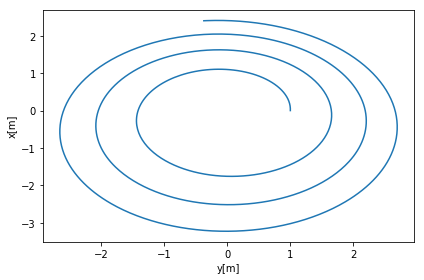

In [10]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


DeltaT = 0.01
#set up arrays 
tfinal = 10 # in years
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,2*pi])
r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    r[i+1] = r[i] + DeltaT*v[i]
    t[i+1] = t[i] + DeltaT
# Plot position as function of time    
fig, ax = plt.subplots()
#ax.set_xlim(0, tfinal)
ax.set_ylabel('x[m]')
ax.set_xlabel('y[m]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
save_fig("EarthSunEuler")
plt.show()

We notice here that Euler's method doesn't give a stable orbit with for example $\Delta t =0.01$. It
means that we cannot trust Euler's method. Euler's method does not conserve energy. It is an
example of an integrator which is not
[symplectic](https://en.wikipedia.org/wiki/Symplectic_integrator).

Here we present thus two methods, which with simple changes allow us
to avoid these pitfalls. The simplest possible extension is the
so-called Euler-Cromer method.  The changes we need to make to our
code are indeed marginal here.  We need simply to replace

In [3]:
    r[i+1] = r[i] + DeltaT*v[i]

in the above code with the velocity at the new time $t_{i+1}$

In [4]:
    r[i+1] = r[i] + DeltaT*v[i+1]

By this simple caveat we get stable orbits.  Below we derive the
Euler-Cromer method as well as one of the most utlized algorithms for
solving the above type of problems, the so-called Velocity-Verlet
method.


Let us repeat Euler's method.
We have a differential equation

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
  y'(t_i)=f(t_i,y_i)   
\label{_auto1} \tag{1}
\end{equation}
$$

and if we truncate at the first derivative, we have from the Taylor expansion

<!-- Equation labels as ordinary links -->
<div id="eq:euler"></div>

$$
\begin{equation}
   y_{i+1}=y(t_i) + (\Delta t) f(t_i,y_i) + O(\Delta t^2), \label{eq:euler} \tag{2}
\end{equation}
$$

which when complemented with $t_{i+1}=t_i+\Delta t$ forms
the algorithm for the well-known Euler method. 
Note that at every step we make an approximation error
of the order of $O(\Delta t^2)$, however the total error is the sum over all
steps $N=(b-a)/(\Delta t)$ for $t\in [a,b]$, yielding thus a global error which goes like
$NO(\Delta t^2)\approx O(\Delta t)$. 

To make Euler's method more precise we can obviously
decrease $\Delta t$ (increase $N$), but this can lead to loss of numerical precision.
Euler's method is not recommended for precision calculation,
although it is handy to use in order to get a first
view on how a solution may look like.

Euler's method is asymmetric in time, since it uses information about the derivative at the beginning
of the time interval. This means that we evaluate the position at $y_1$ using the velocity
at $v_0$. A simple variation is to determine $x_{n+1}$ using the velocity at
$v_{n+1}$, that is (in a slightly more generalized form)

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
   y_{n+1}=y_{n}+ v_{n+1}+O(\Delta t^2)
\label{_auto2} \tag{3}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
   v_{n+1}=v_{n}+(\Delta t) a_{n}+O(\Delta t^2).
\label{_auto3} \tag{4}
\end{equation}
$$

The acceleration $a_n$ is a function of $a_n(y_n, v_n, t_n)$ and needs to be evaluated
as well. This is the Euler-Cromer method. It is easy to change the above code and see that with the same 
time step we get stable results.


Let us stay with $x$ (position) and $v$ (velocity) as the quantities we are interested in.

We have the Taylor expansion for the position given by

$$
x_{i+1} = x_i+(\Delta t)v_i+\frac{(\Delta t)^2}{2}a_i+O((\Delta t)^3).
$$

The corresponding expansion for the velocity is

$$
v_{i+1} = v_i+(\Delta t)a_i+\frac{(\Delta t)^2}{2}v^{(2)}_i+O((\Delta t)^3).
$$

Via Newton's second law we have normally an analytical expression for the derivative of the velocity, namely

$$
a_i= \frac{d^2 x}{dt^2}\vert_{i}=\frac{d v}{dt}\vert_{i}= \frac{F(x_i,v_i,t_i)}{m}.
$$

If we add to this the corresponding expansion for the derivative of the velocity

$$
v^{(1)}_{i+1} = a_{i+1}= a_i+(\Delta t)v^{(2)}_i+O((\Delta t)^2)=a_i+(\Delta t)v^{(2)}_i+O((\Delta t)^2),
$$

and retain only terms up to the second derivative of the velocity since our error goes as $O(h^3)$, we have

$$
(\Delta t)v^{(2)}_i\approx a_{i+1}-a_i.
$$

We can then rewrite the Taylor expansion for the velocity as

$$
v_{i+1} = v_i+\frac{(\Delta t)}{2}\left( a_{i+1}+a_{i}\right)+O((\Delta t)^3).
$$

Our final equations for the position and the velocity become then

$$
x_{i+1} = x_i+(\Delta t)v_i+\frac{(\Delta t)^2}{2}a_{i}+O((\Delta t)^3),
$$

and

$$
v_{i+1} = v_i+\frac{(\Delta t)}{2}\left(a_{i+1}+a_{i}\right)+O((\Delta t)^3).
$$

Note well that the term $a_{i+1}$ depends on the position at $x_{i+1}$. This means that you need to calculate 
the position at the updated time $t_{i+1}$ before the computing the next velocity.  Note also that the derivative of the velocity at the time
$t_i$ used in the updating of the position can be reused in the calculation of the velocity update as well. 

We can now easily add the Verlet method to our original code as

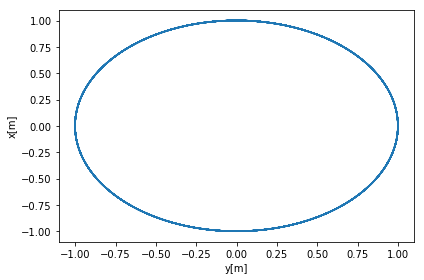

In [11]:
DeltaT = 0.01
#set up arrays 
tfinal = 10
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,2*pi])
r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up forces, air resistance FD, note now that we need the norm of the vecto
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[m]')
ax.set_xlabel('y[m]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
save_fig("EarthSunVV")
plt.show()

You can easily generalize the calculation of the forces by defining a function
which takes in as input the various variables. We leave this as a challenge to you.

Running the above code for various time steps we see that the Velocity-Verlet is fully stable for various time steps.

We can also play around with different initial conditions in order to find the escape velocity from an orbit around the sun with distance one astronomical unit, 1 AU. The theoretical value for the escape velocity, is given by

$$
v = \sqrt{8\pi^2}{r},
$$

and with $r=1$ AU, this means that the escape velocity is $2\pi\sqrt{2}$ AU/yr. To obtain this we required that the kinetic energy of Earth equals the potential energy given by the gravitational force.

Setting

$$
\frac{1}{2}M_{\mathrm{Earth}}v^2=\frac{G\M_{\odot}}{r},
$$

and with $G\M_{\odot}=4\pi^2$ we obtain the above relation for the velocity. Setting an initial velocity say equal to $9$ in the above code, yields a planet (Earth) which escapes a stable orbit around the sun, as seen by running the ode here.

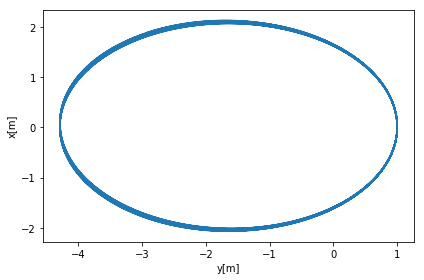

In [16]:
DeltaT = 0.01
#set up arrays 
tfinal = 100
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
# setting initial velocity larger than escape velocity
v0 = np.array([0.0,8.8])
r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up forces, air resistance FD, note now that we need the norm of the vecto
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[m]')
ax.set_xlabel('y[m]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
save_fig("EscapeEarthSunVV")
plt.show()